# Example of high-level interface

In [1]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
from tqdm import tqdm
from itertools import compress
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

In [2]:
DEVICE = 'cuda:0'
SIGMA=0.006

## Toy generative model

In [68]:
def model(z):
    mu = 10**((z[0]+z[1]-0.5)*10)
    x = [np.random.poisson(mu)]
    return x

## Mock data generation

In [69]:
z0 = np.array([0.2,0.1])
x0 = model(z0)
print(x0, z0)

[0] [0.2 0.1]


## Automatic inference 1-dim and 2-dim posteriors

In [72]:
sw = swyft.SWYFT(x0, model, zdim = 2, device = DEVICE, head = None)

In [73]:
sw.run(nworkers=0, nrounds = 1, max_epochs = 20, early_stopping_patience = 3, nsamples = 5000, nbatch = 32, recycle_net = False, threshold = 1e-6)

Adding samples.: 100%|██████████| 4859/4859 [00:00<00:00, 32827.64it/s]


Adding 4859 new samples.


Adding simulations: 100%|██████████| 4859/4859 [00:00<00:00, 5747.52it/s]


Start training
LR iteration 0
Total epochs: 12
Validation losses: [5.4693538546562195, 5.420535445213318, 5.419883638620377, 5.416946113109589, 5.392736315727234, 5.394745707511902, 5.3681769371032715, 5.378715634346008, 5.352349042892456, 5.3917971551418304, 5.38261291384697, 5.353973925113678]
LR iteration 1
Total epochs: 20
Validation losses: [5.329426258802414, 5.3298561573028564, 5.322655767202377, 5.3252294063568115, 5.322416007518768, 5.316062420606613, 5.314961344003677, 5.3181988298892975, 5.317019164562225, 5.314765185117722, 5.313933104276657, 5.3082422614097595, 5.304815292358398, 5.306470155715942, 5.308311551809311, 5.2989436984062195, 5.2978024780750275, 5.299241989850998, 5.294978469610214, 5.295716345310211]
LR iteration 2
Total epochs: 20
Validation losses: [5.289862662553787, 5.2895311415195465, 5.289278209209442, 5.289045095443726, 5.288835436105728, 5.288610219955444, 5.288396239280701, 5.2881960570812225, 5.288005709648132, 5.2878139317035675, 5.287620663642883, 5

In [74]:
sw.comb([[0, 1]],nworkers=0)

Start training
LR iteration 0
Total epochs: 86
Validation losses: [2.7234758883714676, 2.6721773017197847, 2.652647089213133, 2.6391341239213943, 2.6395116597414017, 2.624962642788887, 2.624248957261443, 2.6136655509471893, 2.6034007519483566, 2.5775516517460346, 2.6246326956897974, 2.5625770296901464, 2.5827923230826855, 2.597209246829152, 2.5155272129923105, 2.6315288320183754, 2.525166016072035, 2.5335841830819845, 2.534825375303626, 2.5416377522051334, 2.551600132137537, 2.6532026268541813, 2.5403737761080265, 2.588716082274914, 2.6408000607043505, 2.5148320384323597, 2.5788595229387283, 2.756626695394516, 2.5380925480276346, 2.605479622259736, 2.534972697496414, 2.5195619259029627, 2.5431373827159405, 2.5661645364016294, 2.534099480137229, 2.509343095123768, 2.5597092788666487, 2.5019603241235018, 2.591309605166316, 2.5500517562031746, 2.5330701004713774, 2.693009277805686, 2.6402020640671253, 2.4974643532186747, 2.6165363676846027, 2.573922211304307, 2.5845025181770325, 2.5679114

## Plot posteriors

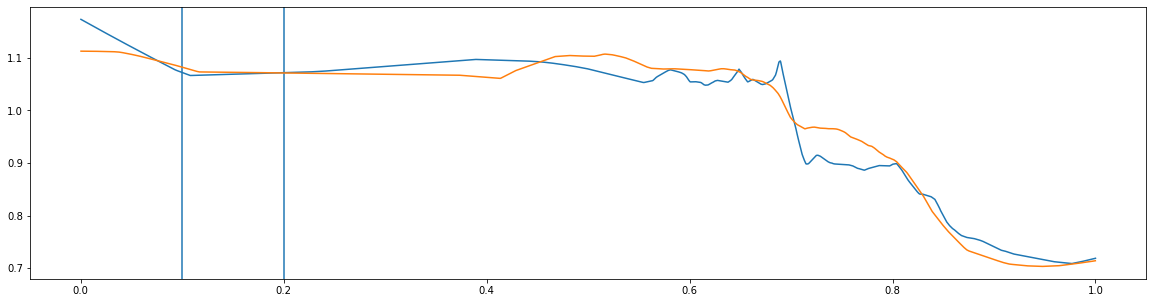

In [75]:
plt.figure(figsize=(20, 5))
for i in range(2):
    z, p = sw.posterior(i, version = -1)
    plt.axvline(z0[i])
    plt.plot(z, p)
    s = swyft.get_stats(z, p)
#plt.gca().set_yscale('log')

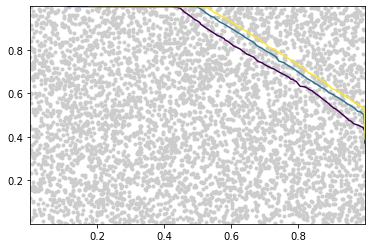

In [76]:
zgrid, lnLgrid = sw.posterior([0, 1])
plt.scatter(zgrid[:,0], zgrid[:,1], marker='.', color='0.8')
max_lnL = lnLgrid[:].max()
plt.tricontour(zgrid[:,0], zgrid[:,1], -lnLgrid+max_lnL, levels = [1, 4, 9])